# **CS/CE 457/464 - Homework Assignment 2: Exploratory Data Analysis (EDA))**

### Breeha Qasim 08283

###### bq08283@st.habib.edu.pk

In [524]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
dataset = pd.read_csv("C:/Users/breeh/Downloads/FIFA_Players_Data.csv")

In [527]:
# dataset

## Part 1

#####  Identifying all the columns which have missing values. 

In [532]:
columns_with_missing_values = dataset.isnull().sum()
print("Columns with missing values:")
columns_with_missing_values

Columns with missing values:


sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur          15465
team_position                 232
team_jersey_number            232
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling     

#####  Dropping empty columns since it cannot be filled by any appropriate values

In [80]:
column_drop = dataset.drop(['release_clause_eur'], axis=1)
# column_drop.iloc[:,10:20]
# column_drop

#####  Replacing  missing valuess

In [416]:
#taking starter code from Sir's lecture "Week2-Class"

### We will use Mode to fill up missing values in Categorical columns
categorical_columns = ['team_position', 'nation_position', 'contract_valid_until', 'joined']
for column in categorical_columns:
    mode_value = column_drop[column].mode()[0]  
    column_drop[column] = column_drop[column].fillna(mode_value)  

### We will use mean to fill up missing values in Numerical columns
numerical_mean_columns = ['dribbling', 'defending', 'physic', 'pace', 'shooting', 'passing']
for column in numerical_mean_columns:
    mean_value = column_drop[column].mean()  
    column_drop[column] = column_drop[column].fillna(mean_value)  

### We will use median to fill up missing values in Ordinal Numerical columns
numerical_median_columns = ['team_jersey_number', 'nation_jersey_number']
for column in numerical_median_columns:
    median_value = column_drop[column].median()  
    column_drop[column] = column_drop[column].fillna(median_value)  

missing_value_summary = column_drop.isnull().sum()
missing_value_summary

sofifa_id                   0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
real_face                   0
team_position               0
team_jersey_number          0
joined                      0
contract_valid_until        0
nation_position             0
nation_jersey_number        0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
skill_ball_control          0
power_stamina               0
dtype: int

##### **^Explanation/Reasoning:** For categories like "team position" and etc, the most frequenct occuring value is used to fill in any gaps in order to maintain consistency in the data, since I cannot take average for categories. For regular numbers such as "dribbling skill", I took average (mean) since it was the most effective way for numerical values. For numbers that rank something, like "jersey numbers", I used median (middle value) to avoid being effected by extreme values

##### “nation_position” value “GK” contains all empty values for pace, shooting, passing etc. columns. So I'm dropping GK rows from the table

In [420]:
column_drop = column_drop.query("nation_position != 'GK'")
column_drop.iloc[1:10,20:30]

,team_jersey_number,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending
1,7.0,7/1/2009,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0
2,10.0,8/28/2009,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0
3,10.0,7/1/2012,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0
5,9.0,7/11/2014,2019.0,SUB,12.0,83.0,87.0,79.0,88.0,42.0
6,10.0,7/1/2012,2017.0,LM,10.0,90.0,82.0,84.0,91.0,32.0
7,20.0,8/17/2012,2016.0,LS,9.0,74.0,90.0,82.0,83.0,33.0
8,31.0,7/1/2002,2016.0,SUB,7.0,61.0,81.0,85.0,82.0,78.0
9,7.0,7/1/2007,2017.0,SUB,12.0,89.0,78.0,85.0,92.0,29.0
10,9.0,7/1/2013,2015.0,ST,9.0,77.0,86.0,64.0,81.0,40.0


#####  Calculating the final number based on addition or subtraction for “skill_ball_control” and “power_stamina” columns

In [109]:
#calculating final number for 'skill_ball_control' column
for index, value in column_drop['skill_ball_control'].items():
    if isinstance(value, str) and ('+' in value or '-' in value):
        parts = value.split('+') if '+' in value else value.split('-')
        column_drop.at[index, 'skill_ball_control'] = int(parts[0]) + int(parts[1]) if '+' in value else int(parts[0]) - int(parts[1])
    else:
        column_drop.at[index, 'skill_ball_control'] = int(value)

#calculating final number for 'power_stamina' column
for index, value in column_drop['power_stamina'].items():
    if isinstance(value, str) and ('+' in value or '-' in value):
        parts = value.split('+') if '+' in value else value.split('-')
        column_drop.at[index, 'power_stamina'] = int(parts[0]) + int(parts[1]) if '+' in value else int(parts[0]) - int(parts[1])
    else:
        column_drop.at[index, 'power_stamina'] = int(value)
column_drop.iloc[0:10,30:34]

,physic,skill_ball_control,power_stamina
0,63.0,96,76
1,79.0,89,89
2,64.0,91,89
3,86.0,90,78
5,79.0,89,86
6,64.0,89,75
7,68.0,86,72
8,80.0,86,86
9,62.0,90,72
10,73.0,81,71


##### **^Explanation/Reasoning:** We're examining two columns here to ensure that all values are converted into numerical values. Here it is checking if each row has a string containing a '+' or '-' symbol. If a symbol is found, the code will split the value into two parts then will perform the mathematical operation addition or subtraction and then will return back the result. If the value doesn't contain a '+' or '-', it simply converts the value to an integer. This ensures that all values in these columns are converted into integer numbers.

##### The final formatted csv has cleaned data

In [112]:
column_drop.to_csv("C:/Users/breeh/Downloads/FIFAPlayersCleanup.csv")

## Part 2

In [124]:
dataset2 = pd.read_csv("C:/Users/breeh/Downloads/FIFAPlayersCleanup.csv")
# dataset2

#####  Generating appropriate summary (count, mean, median or mode) tables

In [176]:
# 1. Count of Players by Club
player_count_by_club = dataset2.groupby('club').size().reset_index(name='player_count').sort_values(by='player_count', ascending=False)
print("Count of Players by Club:\n")
print(player_count_by_club)

Count of Players by Club:

                        club  player_count
337                Liverpool            33
280                Hull City            33
189                  Everton            33
47   Athletic Club de Bilbao            33
324                    Lazio            33
..                       ...           ...
140                 Colombia             1
457             Ruch Chorzów             1
263                   Greece             1
92               Busan IPark             1
595            Śląsk Wrocław             1

[596 rows x 2 columns]


##### **^Explanation/Reasoning:** The number of players for each football team is displayed in the output above. The top clubs on the list are those with the greatest number of players like Liverpool, Hull City, Everton, and Lazio have all have 33 players. The table also shows clubs with just one player, such as Colombia, Ruch Chorzów, and Greece. In total, 596 teams are listed along with the number of players each have.


In [156]:
# 2. Median Team Jersey Number by Club
median_jersey_number_by_club = dataset2.groupby('club')['team_jersey_number'].median().reset_index().rename(columns={'team_jersey_number': 'median_jersey_number'})
print("Median Team Jersey Number by Club:\n")
print(median_jersey_number_by_club)

Median Team Jersey Number by Club:

                         club  median_jersey_number
0       1. FC Heidenheim 1846                  18.5
1        1. FC Kaiserslautern                  19.5
2                  1. FC Köln                  16.5
3              1. FC Nürnberg                  22.5
4          1. FC Union Berlin                  19.5
..                        ...                   ...
591      Zenit St. Petersburg                  22.0
592           Çaykur Rizespor                  14.5
593  Évian Thonon Gaillard FC                  21.0
594                 Örebro SK                  16.5
595             Śląsk Wrocław                  11.0

[596 rows x 2 columns]


##### **^Explanation/Reasoning:** This output shows the median jersey number for players in each football club. The median is the middle value when the jersey numbers are sorted, giving a good idea of the typical number assigned to players in each team. For eg, FC Heidenheim 1846 has a median jersey number of 18.5

In [160]:
# 3. Mode of Preferred Foot by Nationality
mode_preferred_foot_by_nationality = dataset2.groupby('nationality')['preferred_foot'].agg(lambda x: x.mode()[0]).reset_index()
print("\nMode of Preferred Foot by Nationality:\n")
print(mode_preferred_foot_by_nationality)


Mode of Preferred Foot by Nationality:

           nationality preferred_foot
0              Albania          Right
1              Algeria          Right
2               Angola          Right
3    Antigua & Barbuda           Left
4            Argentina          Right
..                 ...            ...
143         Uzbekistan          Right
144          Venezuela          Right
145              Wales          Right
146             Zambia          Right
147           Zimbabwe          Right

[148 rows x 2 columns]


##### **^Explanation/Reasoning:** This output shows the preferred foot for players from each nationality. It lists whether players from different countries use their left or right foot. For example, players from Albania, Algeria, and Argentina most commonly prefer their right foot, while players from Antigua & Barbuda prefer their left foot. There are 148 different nationalities in total, and for each one, the most common preferred foot is shown.

#####  Generating appropriate visualizations for **Univariate analysis**

#####  **Bar Graphs**

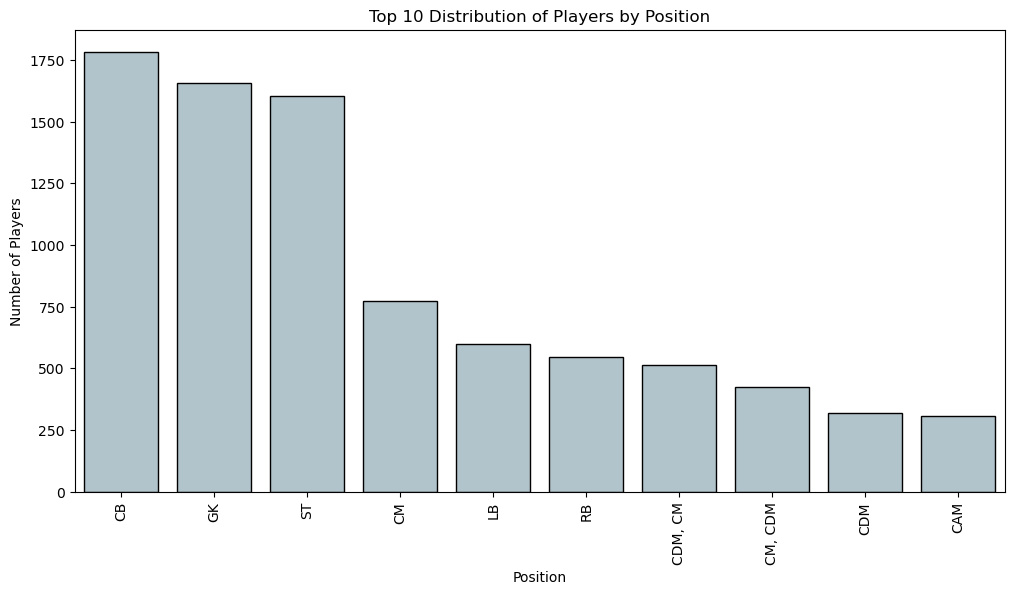

In [480]:
# Bar Chart 1: Top 10 distribution of Players by Position
position_counts = dataset2['player_positions'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, color='#AEC6CF', edgecolor='black')
plt.title('Top 10 Distribution of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)  
plt.show()

##### **^Explanation/Reasoning:** This bar chart shows the top 10 player positions based on the number of players for each position. With more than 1,500 players in each of the three positions, CB, GK, and ST have the highest player counts. There are less players at positions like CM, LB, and RB. The chart also shows additional defensive and midfield positions like CDM and CAM. 

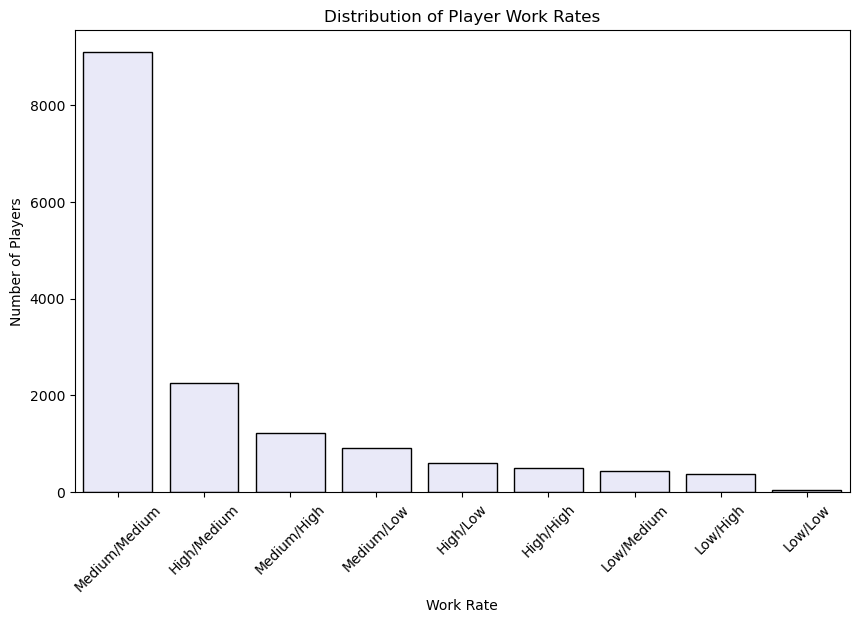

In [482]:
# Bar Chart 2: Distribution of Player Work Rates
work_rate_counts = dataset2['work_rate'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=work_rate_counts.index, y=work_rate_counts.values,color='#E6E6FA', edgecolor='black')
plt.title('Distribution of Player Work Rates')
plt.xlabel('Work Rate')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

##### **^Explanation/Reasoning:** This bar chart shows the distribution of player work rates. Most players have a medium/medium work rate, with more than 8,000 players falling into this category. Other work rates like high/medium, medium/high, and medium/low have significantly fewer players. Work rates such as high/low, low/medium, and low/low are much less. In short, the chart gives a clear view of how players work rates are spread across different categories.

#####  **Histograms**

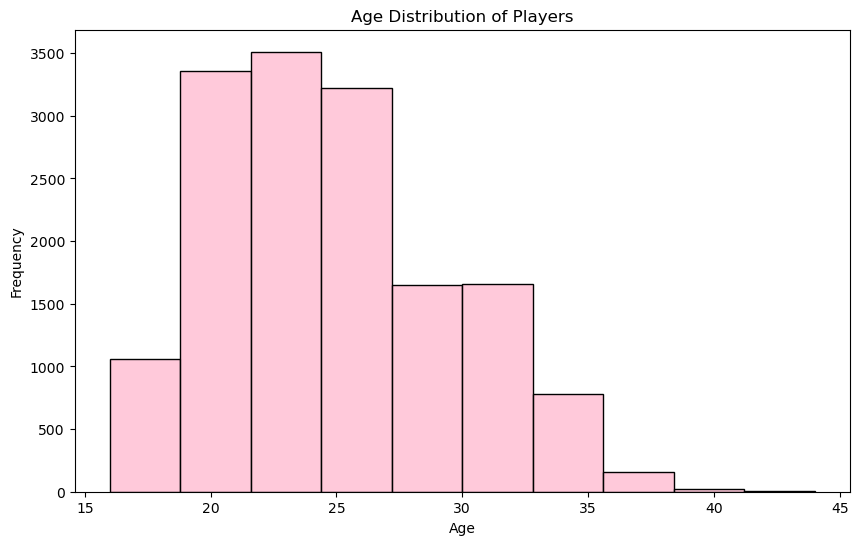

In [490]:
# Histogram 1: Age Distribution of Players
plt.figure(figsize=(10, 6))
sns.histplot(dataset2['age'], bins=10, color='#FFB7CE', edgecolor='black')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### **^Explanation/Reasoning:** This histogram shows the age distribution of players. Most players are between the ages of 20 and 30, with the highest number of players around 25 years old. As the age increases beyond 30, the number of players decreases sharply, with very few players above the age of 35. This means that the majority of players are younger, and there are fewer older players.

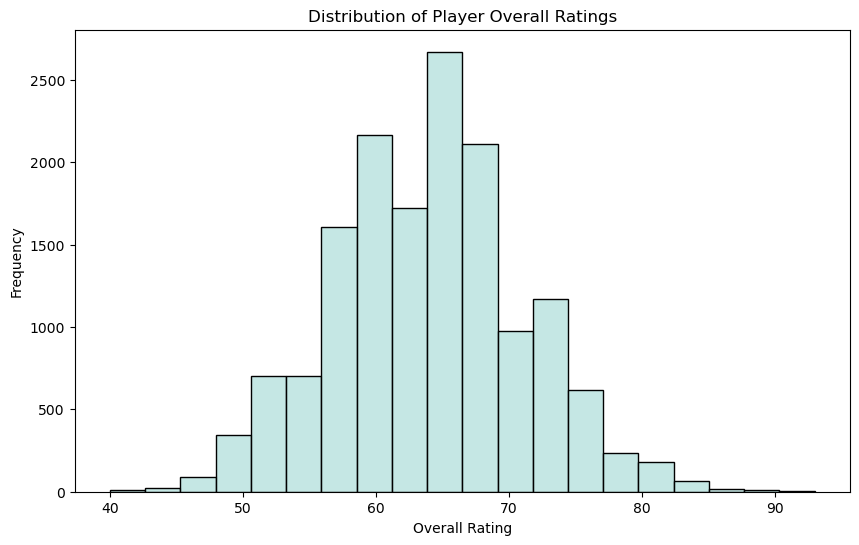

In [486]:
# Histogram 2: Distribution of Player Overall Ratings
plt.figure(figsize=(10, 6))
sns.histplot(dataset2['overall'], bins=20, color='#B2DFDB', edgecolor='black')
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

##### **^Explanation/Reasoning:** This histogram shows the distribution of player overall ratings. Most players have an overall rating between 60 and 70, with the peak around 65. There are fewer players with ratings below 50 or above 80, and almost no players have a rating over 90. The chart shows that the majority of players are in the middle rating range, with only a few at the very high or very low ends.

#####  Generating one **Multivariate** visualization (more than two variables) 

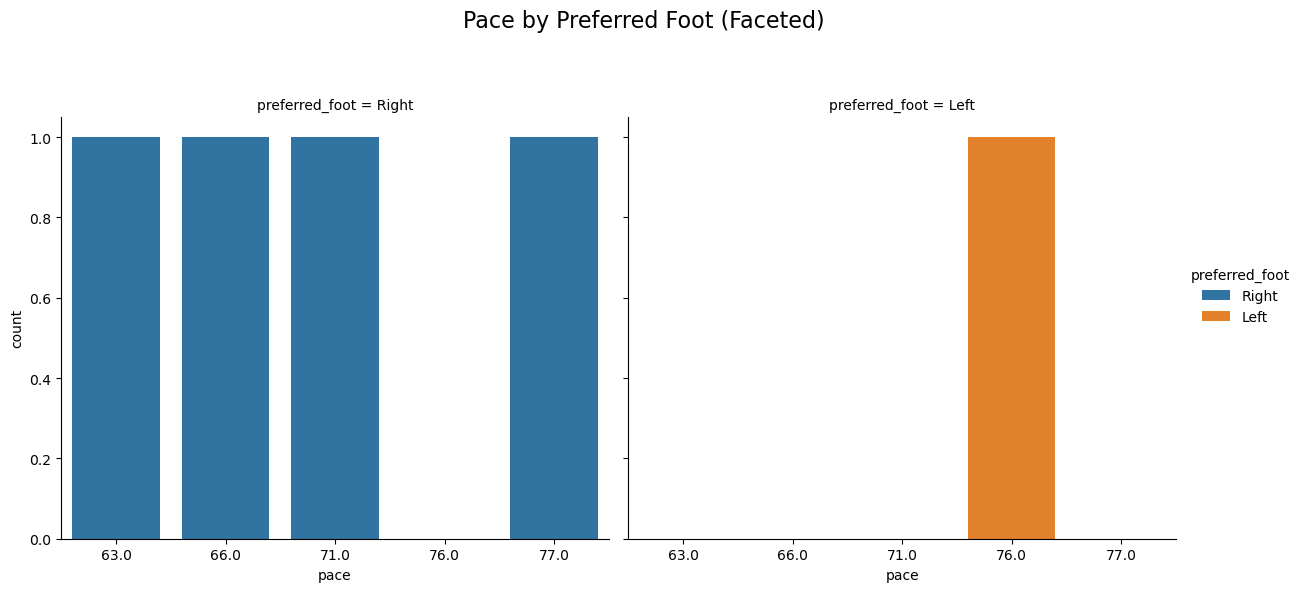

In [508]:
subset_df = dataset2[['pace', 'shooting', 'preferred_foot']].dropna().sample(5) 
sns.catplot(x='pace', hue='preferred_foot', col='preferred_foot', data=subset_df, kind='count', height=6, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle('Pace by Preferred Foot (Faceted)', fontsize=16)
plt.show()

##### **^Explanation/Reasoning:** This chart shows the pace distribution of players based on their preferred foot. The left side represents players who prefer their right foot, while the right side shows players who prefer their left foot. Each bar represents a different pace value for the players. In this small sample of data, the majority of the players are right-footed, and their pace scores range from 63 to 77. There is only one left-footed player in this sample, with a pace score of 76. 

#####  Generating appropriate visualizations for **Bivariate analysis**

#####  **Scatter Plots, Box Plots and Correlation Plotas**

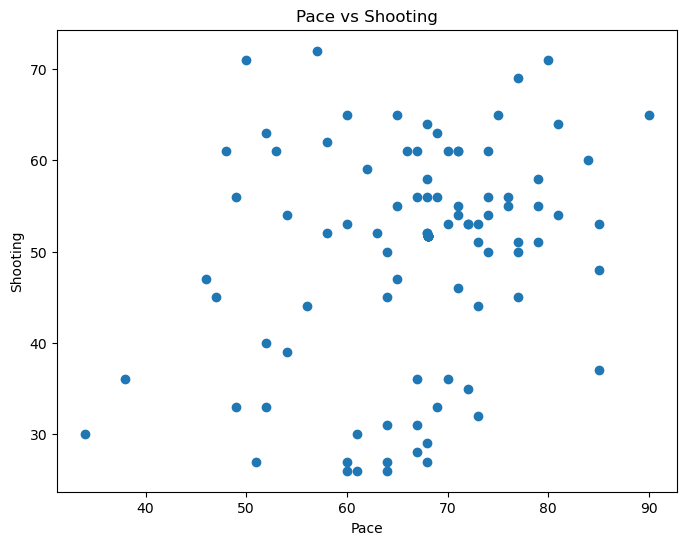

In [355]:
# Scatter Plot 1: Pace vs. Shooting
subset_df = dataset2[['pace', 'shooting']].dropna().sample(100)
plt.figure(figsize=(8, 6))
plt.scatter(subset_df['pace'], subset_df['shooting'])
plt.title('Pace vs Shooting')
plt.xlabel('Pace')
plt.ylabel('Shooting')
plt.show()

##### **^Explanation/Reasoning:** This scatter plot shows the relationship between pace and shooting for 100 players. Each dot represents a player, with pace shown on the x-axis and shooting on the y-axis. The chart doesn't show a strong clear pattern between pace and shooting, as the dots are spread out in different areas. Some players with higher pace also have good shooting, but there are many with lower shooting despite having higher pace, and vice versa. 

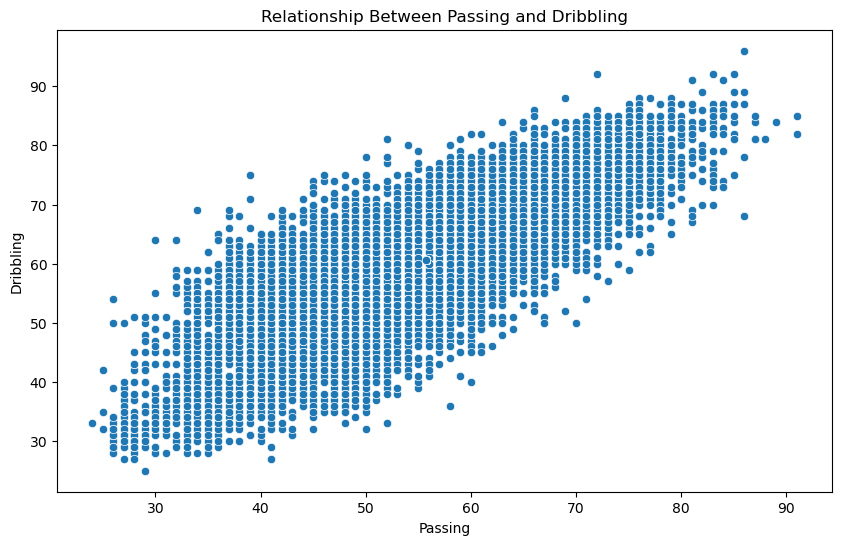

In [357]:
# Scatter Plot 2: Passing vs. Dribbling
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passing', y='dribbling', data=dataset2)
plt.title('Relationship Between Passing and Dribbling')
plt.xlabel('Passing')
plt.ylabel('Dribbling')
plt.show()

##### **^Explanation/Reasoning:** This scatter plot shows the relationship between passing and dribbling skills of players. Each dot represents a player, with passing ability on the x-axis and dribbling ability on the y-axis. The plot shows a clear upward trend, meaning players with higher passing skills also tend to have better dribbling skills. The dots are closely packed along this upward direction, showing a strong positive relationship between passing and dribbling. So we can say that players with good passing are often also good at dribbling.

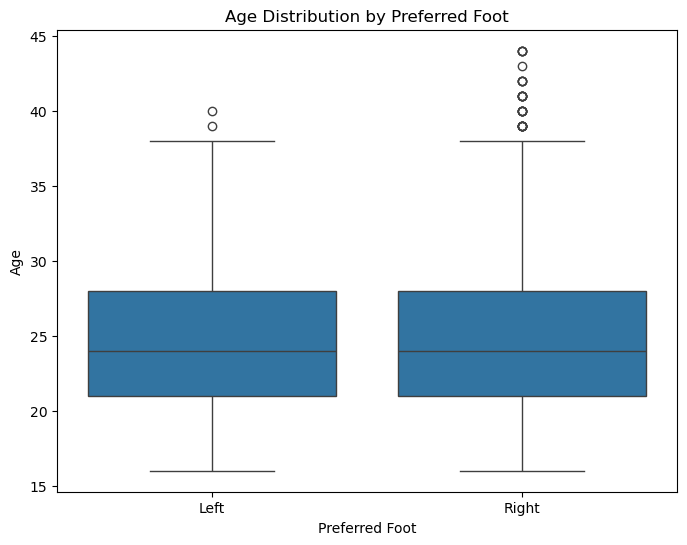

In [359]:
# Box Plot 1: Age by Preferred Foot
plt.figure(figsize=(8, 6))
sns.boxplot(x='preferred_foot', y='age', data=dataset2)
plt.title('Age Distribution by Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Age')
plt.xticks(rotation=0)  
plt.show()

##### **^Explanation/Reasoning:** This box plot shows the age distribution of players based on their preferred foot, either left or right. The box represents the middle 50% of ages, with the line inside showing the median age. The left-footed and right-footed players have a similar age range, with the median age near 25. The lines extending from the box show the full range of ages, while the circles above represent outliers, which are players who are older than most. Overall, the age distribution is similar for both left-footed and right-footed players.

<Figure size 800x600 with 0 Axes>

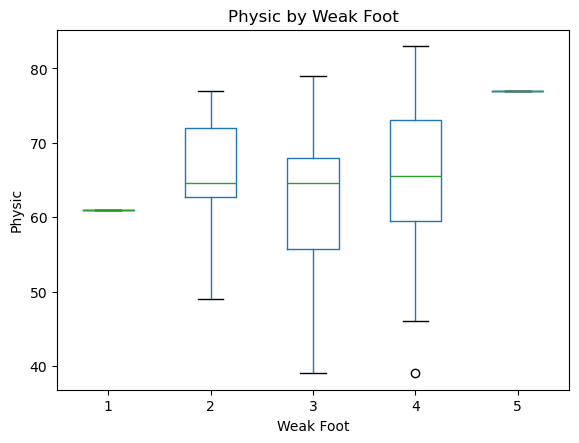

In [477]:
# Box Plot 2: weak_foot (discrete) vs physic (continuous)
subset_df = dataset2[['weak_foot', 'physic']].dropna().sample(100)
plt.figure(figsize=(8, 6))
subset_df.boxplot(column='physic', by='weak_foot', grid=False)
plt.title('Physic by Weak Foot')
plt.suptitle('')  
plt.xlabel('Weak Foot')
plt.ylabel('Physic')
plt.show()

##### **^Explanation/Reasoning:** This box plot shows the relationship between players weak foot ratings and their physic attribute. The weak foot rating ranges from 2 to 5. Each box represents the distribution of the physic scores for players with different weak foot ratings. The line inside each box represents the median physic score. The height of the boxes shows how spread out the physic scores are for each weak foot rating. The plot shows that players with different weak foot ratings tend to have similar physic scores. The small circle near weak foot rating 4 represents an outlier.

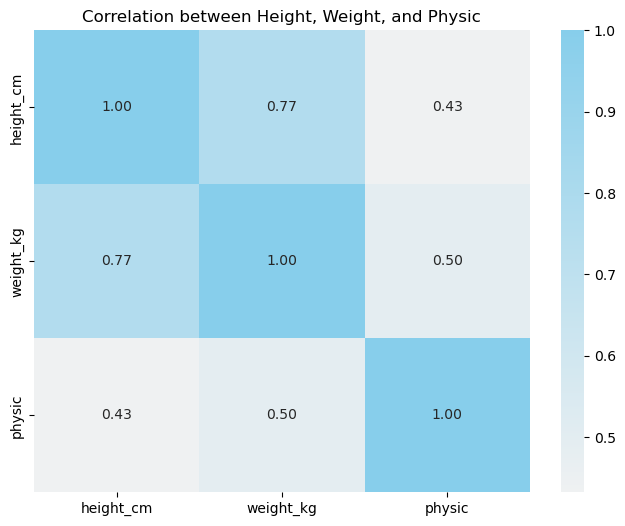

In [519]:
# Correlation Plot: Between Height, Weight, and Physic
pastel_cmap = sns.light_palette("skyblue", as_cmap=True)
subset_df = dataset2[['height_cm', 'weight_kg', 'physic']].dropna()
corr_matrix = subset_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=pastel_cmap, fmt=".2f")
plt.title('Correlation between Height, Weight, and Physic')
plt.show()

##### **^Explanation/Reasoning:** This heatmap shows the correlation between three variables: height, weight, and physic. A correlation value of 1.00 means a perfect positive relationship. For example, height and weight have a strong correlation of 0.77, meaning taller players tend to weigh more. The correlation between height and physic is weaker at 0.43, while the correlation between weight and physic is a bit stronger at 0.50. The values closer to 1 show stronger relationships, while lower values show weaker relationships between the variables. esents an outlier.